# STAT303-2: Assignment 2

In [1]:
#Import packages
import pandas as  pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

sns.set(style = "ticks", palette = "bright", rc = {'figure.figsize': (12,5)})
#Importing data
soc = pd.read_csv("soc_ind.csv")
infmort = pd.read_csv("infmort.csv")

## Part 1
The dataset *infmort.csv* gives the infant mortality rates of different countries in the world.

This part is worth 17 points overall.

#### (1a) 
Make one plot including the following subplots: (i) a boxplot of mortality against region, (ii) a boxplot of income against region, and (iii) a scatter plot of mortality against income. Be sure to include appropriate axis labels. 

What trends do you see in these plots? Mention the trend separately for each subplot.

*(3 points for code and plots, 2 points for written answers)*

<AxesSubplot:xlabel='region', ylabel='mortality'>

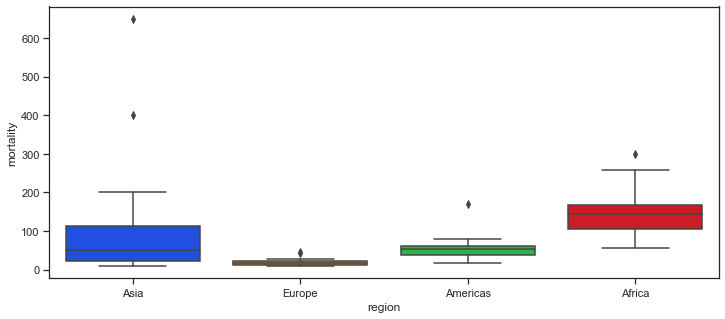

In [2]:
#Boxplot of mortality against region
sns.boxplot(y = "mortality", x = "region", data = infmort)

**For the boxplot of mortality against region, I notice that Asia has the largest range out of the four regions with the outliers pulling it way out. Additionally, Europe has the smallest range out of the four regions. Africa has the highest average infant mortality, but not the largest range nor largest maximum value.**

<AxesSubplot:xlabel='region', ylabel='income'>

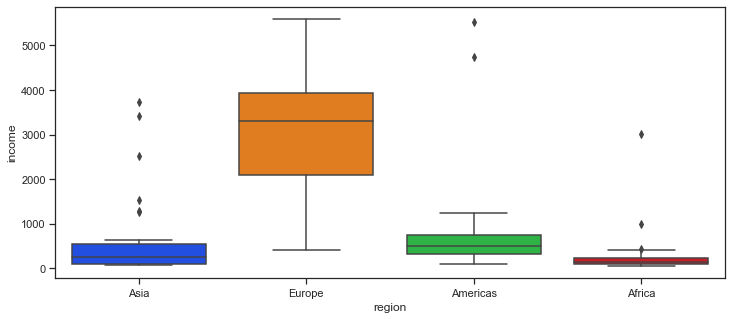

In [3]:
#Boxplot of income against region
sns.boxplot(y = "income", x = "region", data = infmort)

**For the boxplot of income against region, I notice that Europe has the largest range by far out of the four regions, and no outliers, interestingly enough. Additionally, despite not having the largest range, the Americas has potentially the largest maximum value with outliers that go way out. Alternatively, Africa has the smallest range out of the four regions.**

<AxesSubplot:xlabel='income', ylabel='mortality'>

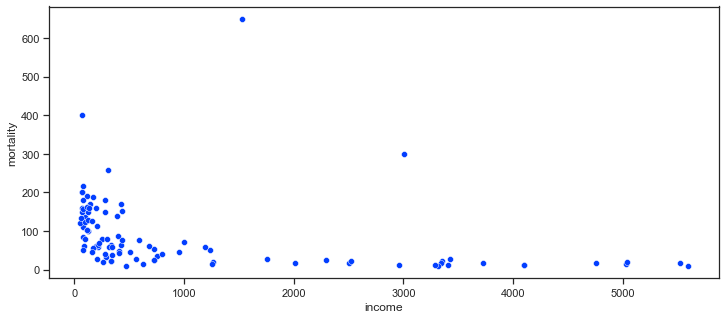

In [4]:
#Scatter plot of mortality against income
sns.scatterplot(y = "mortality", x = "income", data = infmort)

**For the scatterplot of mortality against income, with the exception of two distinct outliers, the scatterplot has a firmly inverse relationship that sees that as income increases, mortality decreases.**

#### (1b)

Europe seems to have the lowest infant mortality, but it also has the highest per capita annual income. We want to see if  Europe still has the lowest mortality if we remove the effect of income from the mortality. We will answer this question with the following steps.

##### (1b-i)

Within one visualization, use subplots to plot: (1) mortality against income, (2) log(mortality) against income, (3) mortality against log(income), and (4) log(mortality) against log(income). Be sure to include appropriate axis labels. 

*(2 points for code)*

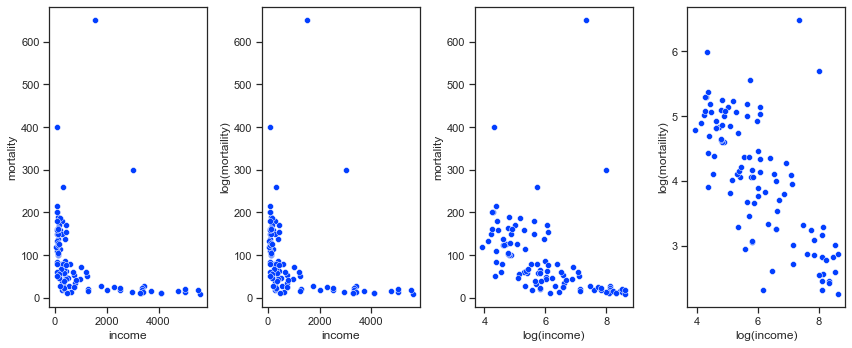

In [5]:
y = infmort["mortality"]
x = infmort["income"]
y1 = np.log(infmort["mortality"])
x1 = infmort["income"]
y2 =infmort["mortality"]
x2 = np.log(infmort["income"])
y3 = np.log(infmort["mortality"])
x3 = np.log(infmort["income"])

fig, ax = plt.subplots(1,4)
sns.scatterplot(x = x, y = y, data = infmort, ax = ax[0])
sns.scatterplot(x = x1, y = y2, data = infmort, ax = ax[1])
sns.scatterplot(x = x2, y = y2, data = infmort, ax = ax[2])
sns.scatterplot(x = x3, y = y3, data = infmort, ax = ax[3])

ax[1].set_ylabel('log(mortaility)')
ax[2].set_xlabel('log(income)')
ax[3].set_ylabel('log(mortaility)')
ax[3].set_xlabel('log(income)')

fig.tight_layout()

##### (1b-ii)

Based on the plots from (1b-i), postulate (describe) an appropriate model to predict mortality as a function of income. Fit the corresponding model and print the model summary.

*(1 point for answer, 2 points for code)*

In [6]:
#Creating and fitting model
ols_object = smf.ols(formula = 'y3~x3', data = infmort)
logmodel = ols_object.fit()
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     99.84
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           1.14e-16
Time:                        23:28:24   Log-Likelihood:                -104.34
No. Observations:                 101   AIC:                             212.7
Df Residuals:                      99   BIC:                             217.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1458      0.317     22.575      0.000       6.518       7.774
x3            -0.5118      0.051     -9.992      0.000      -0.613      -0.410
==============================================================================
Omnibus:                       38.668   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.408
Skew:                           1.255   Prob(JB):                     7.93e-29
Kurtosis:                       7.945   Cond. No.                         29.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**I postulate that the appropriate model to predict mortality as a function of income utilises log on both variables. I believe this because the clearest relationship in the four scatterplots I created above appeared in the very last scatterplot.**

##### (1b-iii)

Update the model developed in the previous question (1b-ii) by adding *region* as a predictor. Print the model summary.

*(2 points for code)*

In [7]:
ols_object = smf.ols(formula = 'y3~x3 + region', data = infmort)
model2 = ols_object.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     38.55
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           3.29e-19
Time:                        23:28:24   Log-Likelihood:                -91.189
No. Observations:                 101   AIC:                             192.4
Df Residuals:                      96   BIC:                             205.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.4030      0.358     17.871      0.000       5.692       7.114
region[T.Americas]    -0.6022      0.190     -3.166      0.002      -0.980      -0.225
region[T.Asia]        -0.7233      0.163     -4.431      0.000      -1.047      -0.399
region[T.Europe]      -1.2028      0.259     -4.647      0.000      -1.717      -0.689
x3                    -0.2994      0.067     -4.441      0.000      -0.433      -0.166
==============================================================================
Omnibus:                       44.959   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.758
Skew:                           1.428   Prob(JB):                     1.13e-38
Kurtosis:                       8.777   Cond. No.                         42.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### (1b-iv)

Use the model developed in the previous question (1b-iii) to compute *adjusted_mortality* for each observation in the data, where adjusted mortality is the mortality after removing the estimated effect of income. Make a boxplot of adjusted mortality against region. Be sure to include appropriate axis labels. 

*(3 points for code)*

<AxesSubplot:xlabel='region', ylabel='adjusted_mortality'>

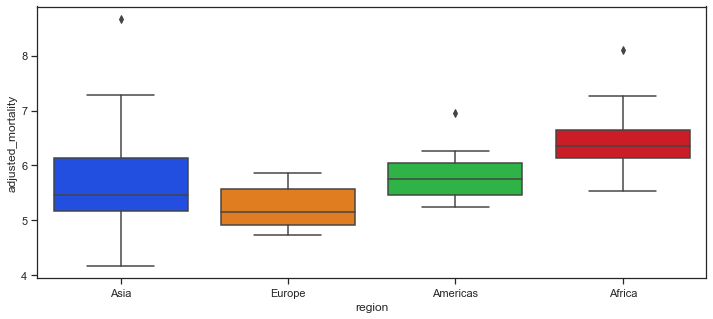

In [8]:
#Transforming variables
infmort_copy = infmort.copy()
infmort_copy["income"] = np.log(infmort_copy["income"])
infmort_copy["mortality"] = np.log(infmort_copy["mortality"])

#Model
ols_object = smf.ols(formula = 'mortality~income + region', data = infmort_copy)
model2 = ols_object.fit()
model2.summary()

#Computing adjusted_mortality
infmort_copy['adjusted_mortality'] = (infmort_copy['mortality'] - (model2.params['income'] * infmort_copy['income']))


#Boxplot of adjusted_mortality against region
sns.boxplot(data = infmort_copy, x = 'region', y = 'adjusted_mortality')

##### (1b-v) 
Does Europe still has the lowest mortality after removing the effect of income from mortality? After adjusting for income, do more African / Asian / American countries seem to do better than European countries with regard to mortality? 

*(2 points for answers)*

**Interestingly enough, by removing the effects of income from mortality, Europe may actually have the highest infant mortality out of the four regions with Africa actually having the lowest mortality. Additionally, Asian and the Americas appear to generally have lower infant mortality when compared to Europe.**

## Part 2

The dataset *soc_ind.csv* contains the GDP per capita of some countries along with several social indicators.

This part is worth 21 points overall.

#### (2a)

For a simple linear regression model predicting *gdpPerCapita*, which predictor will provide the best model fit *(ignore categorical predictors)*? Let that predictor be $P$.

*(1 point for code, 1 point for answer)*

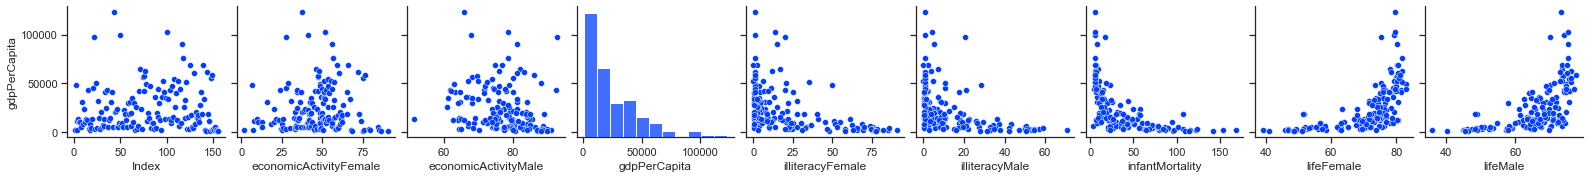

In [9]:
#Creating a pairplot of soc["gdpPerCapita"]
sns.pairplot(data = soc, y_vars = "gdpPerCapita")

In [10]:
#Finding the correlation of variables in the soc dataset
soc.corr()

,Index,economicActivityFemale,economicActivityMale,gdpPerCapita,illiteracyFemale,illiteracyMale,infantMortality,lifeFemale,lifeMale
Index,1.000000,0.963079,0.083285,0.073671,-0.192510,-0.169524,-0.008166,-0.000561,-0.082617
economicActivityFemale,0.963079,1.000000,0.096822,0.052964,-0.177559,-0.141644,0.011667,-0.029456,-0.103137
economicActivityMale,0.083285,0.096822,1.000000,-0.167231,0.428277,0.450352,0.382949,-0.367124,-0.295536
gdpPerCapita,0.073671,0.052964,-0.167231,1.000000,-0.457012,-0.471689,-0.584060,0.604029,0.592267
illiteracyFemale,-0.192510,-0.177559,0.428277,-0.457012,1.000000,0.959948,0.792230,-0.783343,-0.709332
illiteracyMale,-0.169524,-0.141644,0.450352,-0.471689,0.959948,1.000000,0.755333,-0.750800,-0.684587
infantMortality,-0.008166,0.011667,0.382949,-0.584060,0.792230,0.755333,1.000000,-0.947045,-0.915713
lifeFemale,-0.000561,-0.029456,-0.367124,0.604029,-0.783343,-0.750800,-0.947045,1.000000,0.974262
lifeMale,-0.082617,-0.103137,-0.295536,0.592267,-0.709332,-0.684587,-0.915713,0.974262,1.000000


**Since the lifeFemale variable is correlated with the gdpPerCapita at 0.604, which is the highest magnitude of correlation in relation to the other variables and gdpPerCapita, lifeFemale is predictor P.**

#### (2b)

Make a scatterplot of *gdpPerCapita* vs $P$. Does the relationship between *gdpPerCapita* and $P$ seem linear or non-linear?

*(1 point for code, 1 point for answer)*

<AxesSubplot:xlabel='lifeFemale', ylabel='gdpPerCapita'>

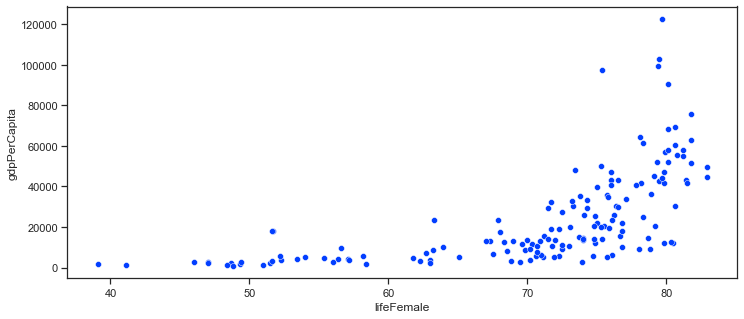

In [11]:
#Creating the scatterplot of gdpPerCapita versus predictor P
sns.scatterplot(data = soc, x = "lifeFemale", y = "gdpPerCapita")

**According to the scatterplot of gdpPerCapita against lifeFemale (predictor P), the relationship between these two variables appears non-linear.**

#### (2c)

If the relationship identified in (2b) is non-linear, investigate transformation(s) of the predictor $P$ in the model that might improve the model fit. To do so, use scatterplots displaying values of *gdpPerCapita* against corresponding values of $P$ under different transformation(s). 

When you've settled on an optimal model, report the predictors included in that model. Fit your new model and report the change in the R-squared value of this transformed model as compared to the simple linear regression model with only $P$.

*(4 points for code, 2 points for answers)*

Text(0.5, 21.5, 'e^(lifeFemale)')

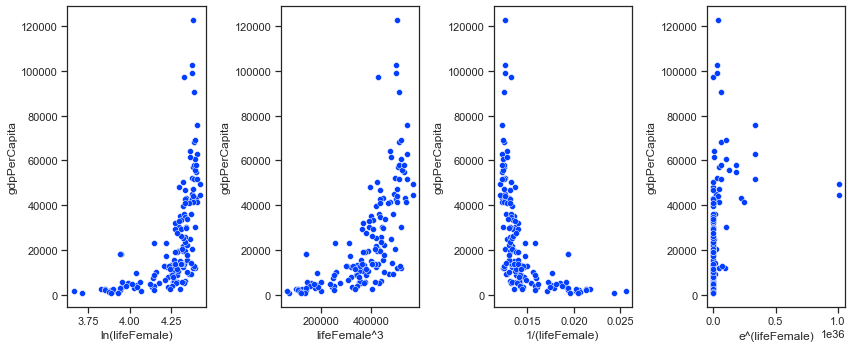

In [12]:
#Creating scatterplots
fig, ax = plt.subplots(1,4)
sns.scatterplot(x = np.log(soc['lifeFemale']), y = soc['gdpPerCapita'], ax = ax[0])
sns.scatterplot(x = soc['lifeFemale']**3, y = soc['gdpPerCapita'], ax = ax[1])
sns.scatterplot(x = 1/(soc['lifeFemale']), y = soc['gdpPerCapita'], ax = ax[2])
sns.scatterplot(x = np.exp(soc['lifeFemale']), y = soc['gdpPerCapita'], ax = ax[3])
plt.tight_layout()

#Titling plots
ax[0].set_xlabel('ln(lifeFemale)')
ax[1].set_xlabel('lifeFemale^3')
ax[2].set_xlabel('1/(lifeFemale)')
ax[3].set_xlabel('e^(lifeFemale)')

Text(0.5, 1.0, 'Square Root Transformation')

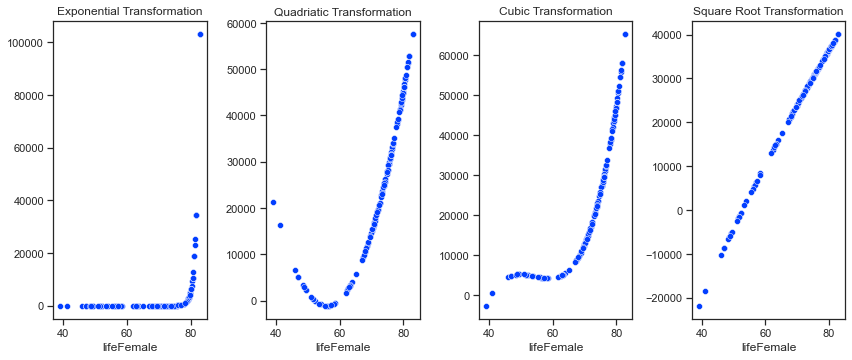

In [13]:
#Transforming predictor P
predict_exp = smf.ols(data = soc, formula = "gdpPerCapita ~ lifeFemale + I(np.exp(lifeFemale))").fit().predict()
predict_quad = smf.ols(data = soc, formula = "gdpPerCapita ~ lifeFemale + I(lifeFemale ** 2)").fit().predict()
predict_cubed = smf.ols(data = soc, formula = "gdpPerCapita ~ lifeFemale + I(lifeFemale ** 2) + I(lifeFemale ** 3)").fit().predict()
predict_sqrt = smf.ols(data = soc, formula = "gdpPerCapita ~ np.sqrt(lifeFemale)").fit().predict()

#Creating scatterplots
fig, ax = plt.subplots(1,4)
sns.scatterplot(x = soc.lifeFemale, y = predict_exp, ax = ax[0])
sns.scatterplot(x = soc.lifeFemale, y = predict_quad, ax = ax[1])
sns.scatterplot(x = soc.lifeFemale, y = predict_cubed, ax = ax[2])
sns.scatterplot(x = soc.lifeFemale, y = predict_sqrt, ax = ax[3])
plt.tight_layout()

#Titling plots
ax[0].set_title('Exponential Transformation')
ax[1].set_title('Quadriatic Transformation')
ax[2].set_title('Cubic Transformation')
ax[3].set_title('Square Root Transformation')

In [14]:
#Fitting the new model
ols_object = smf.ols(formula = 'gdpPerCapita~lifeFemale + I(lifeFemale**2)+ I(lifeFemale**3)', data = soc)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdpPerCapita   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     54.89
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           4.73e-24
Time:                        23:28:28   Log-Likelihood:                -1721.4
No. Observations:                 155   AIC:                             3451.
Df Residuals:                     151   BIC:                             3463.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -4.385e+05   2.48e+05     -1.768      0.079   -9.28e+05    5.15e+04
lifeFemale          2.481e+04    1.2e+04      2.063      0.041    1045.838    4.86e+04
I(lifeFemale ** 2)  -459.6730    190.985     -2.407      0.017    -837.021     -82.325
I(lifeFemale ** 3)     2.8187      0.995      2.833      0.005       0.853       4.785
==============================================================================
Omnibus:                       66.621   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.965
Skew:                           1.538   Prob(JB):                     8.89e-65
Kurtosis:                       9.017   Cond. No.                     7.44e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#Examining the old model
old = smf.ols(formula = 'gdpPerCapita~lifeFemale', data = soc)
old = old.fit()
old.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdpPerCapita   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     87.89
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           8.77e-17
Time:                        23:28:28   Log-Likelihood:                -1743.3
No. Observations:                 155   AIC:                             3491.
Df Residuals:                     153   BIC:                             3497.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.436e+04   1.06e+04     -7.002      0.000   -9.53e+04   -5.34e+04
lifeFemale  1398.2136    149.145      9.375      0.000    1103.564    1692.863
==============================================================================
Omnibus:                       59.449   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.079
Skew:                           1.551   Prob(JB):                     3.18e-37
Kurtosis:                       7.051   Cond. No.                         504.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The new model includes a cubed predictor P and gdpPerCapita. I took the cubic form of predictor P into my model. In comparison to the previous (basic) model without cubic transformations on predictor P, the new model has a r-squared of 0.522 compared to the r-squared of 0.365 from the old model. This means that the new cubic model seems to be a more optimal model for this relationship.**

#### (2d)

Plot the regression curve of the transformed model (developed in the previous question (2c)) over the scatterplot in (2b) to visualize model fit. Also include the regression line of the simple linear regression model with only $P$ on the same plot. Be sure to include a legend to distinguish the two models.

*(3 points for code)*

<AxesSubplot:xlabel='lifeFemale', ylabel='gdpPerCapita'>

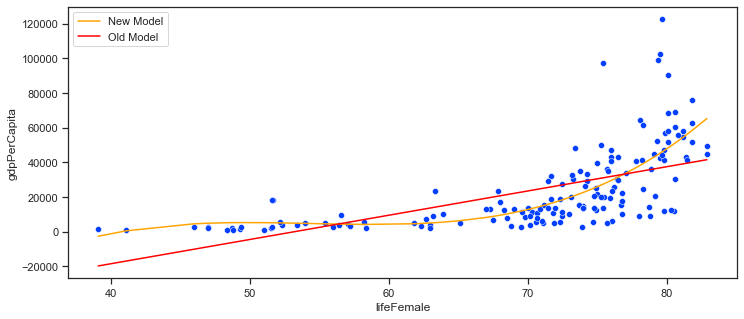

In [16]:
#Creating predictions of the regression curves for each model
prediction = model.predict(soc)
oldprediction = old.predict(soc)

# Plotting the only trendline
sns.lineplot(x = soc.lifeFemale, y = prediction, color = "orange", label = "New Model")
sns.lineplot(x = soc.lifeFemale, y = oldprediction, color = "red", label = "Old Model")
sns.scatterplot(data = soc, x = "lifeFemale", y = "gdpPerCapita", legend = True)

#### (2e)
Develop a model to predict *gdpPerCapita* with $P$ and *continent* as predictors. For a given value of $P$, which continents **do not** have a signficant difference between their mean *gdpPerCapita* and that of Africa? Consider a significance level of 5%.

*(1 point for code, 1 point for answer)*

In [17]:
#Fitting the new model + continent
ols_object = smf.ols(formula = 'gdpPerCapita~lifeFemale + continent', data = soc)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdpPerCapita   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     25.43
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           1.28e-20
Time:                        23:28:31   Log-Likelihood:                -1723.6
No. Observations:                 155   AIC:                             3461.
Df Residuals:                     148   BIC:                             3483.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -7.208e+04   1.14e+04     -6.305      0.000   -9.47e+04   -4.95e+04
continent[T.Asia]           1324.7980   4805.099      0.276      0.783   -8170.667    1.08e+04
continent[T.Europe]         9167.0203   5785.650      1.584      0.115   -2266.134    2.06e+04
continent[T.North America] -1.446e+04   5947.502     -2.431      0.016   -2.62e+04   -2704.270
continent[T.Oceania]       -1.429e+04   6063.764     -2.357      0.020   -2.63e+04   -2307.304
continent[T.South America] -1.329e+04   6462.516     -2.056      0.042   -2.61e+04    -516.198
lifeFemale                  1393.4213    194.062      7.180      0.000    1009.931    1776.911
==============================================================================
Omnibus:                       67.873   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.081
Skew:                           1.701   Prob(JB):                     6.63e-51
Kurtosis:                       7.920   Cond. No.                         721.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**For a given value of P at a significance level of 5%, both Asia and Europe do not have a significant difference between their mean gdpPerCapita and that of Africa.**

#### (2f)

The model developed in (e) has a limitation. It assumes that the increase in mean *gdpPerCapita* with a unit increase in $P$ does not depend on the *continent*. Eliminate this limitation by including interaction of *continent* with $P$ in the model developed in (e). Print the model summary of the model with interactions.

*(2 points for code)*

In [18]:
ols_obj = smf.ols(formula = 'gdpPerCapita~lifeFemale * continent', data = soc)
continentmodel = ols_obj.fit()
continentmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdpPerCapita   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     19.90
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           7.99e-24
Time:                        23:28:31   Log-Likelihood:                -1706.6
No. Observations:                 155   AIC:                             3437.
Df Residuals:                     143   BIC:                             3474.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                             -1.723e+04   1.53e+04     -1.129      0.261   -4.74e+04    1.29e+04
continent[T.Asia]                     -1.094e+05   2.63e+04     -4.156      0.000   -1.61e+05   -5.74e+04
continent[T.Europe]                   -2.774e+05   6.63e+04     -4.185      0.000   -4.08e+05   -1.46e+05
continent[T.North America]              -6.6e+04   4.88e+04     -1.352      0.178   -1.62e+05    3.05e+04
continent[T.Oceania]                  -1.367e+05   5.78e+04     -2.364      0.019   -2.51e+05   -2.24e+04
continent[T.South America]            -7830.3082   8.18e+04     -0.096      0.924   -1.69e+05    1.54e+05
lifeFemale                              428.5595    264.214      1.622      0.107     -93.711     950.830
lifeFemale:continent[T.Asia]           1755.1049    400.782      4.379      0.000     962.882    2547.328
lifeFemale:continent[T.Europe]         3944.6364    869.916      4.535      0.000    2225.080    5664.193
lifeFemale:continent[T.North America]   921.1328    667.359      1.380      0.170    -398.031    2240.297
lifeFemale:continent[T.Oceania]        1898.4382    812.766      2.336      0.021     291.851    3505.026
lifeFemale:continent[T.South America]   135.3138   1134.388      0.119      0.905   -2107.022    2377.650
==============================================================================
Omnibus:                       73.348   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.376
Skew:                           1.785   Prob(JB):                     8.82e-64
Kurtosis:                       8.676   Cond. No.                     5.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### (2g) 
Use the model developed in (2f) to plot regression lines for Africa, Asia, Europe, and Oceania. Put *gdpPerCapita* on the vertical axis and $P$ on the horizontal axis. Use a legend to distinguish among the regression lines of the continents.

*(3 points for code)*

Text(0, 0.5, 'gdpPerCapita')

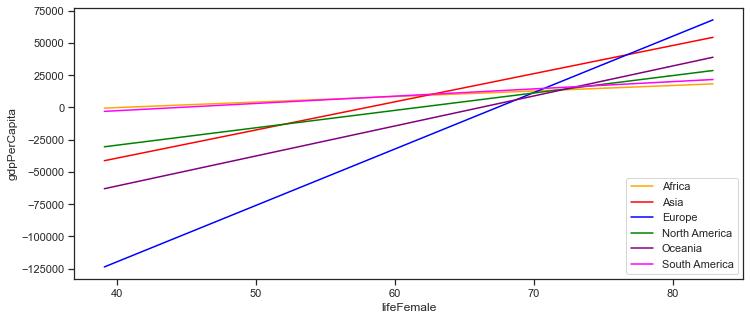

In [19]:
x = soc['lifeFemale']
sns.lineplot(x = x, y = continentmodel.params['Intercept'] + continentmodel.params['lifeFemale'] * x, color = 'orange', label = 'Africa')
sns.lineplot(x = x, y = continentmodel.params['Intercept'] + (continentmodel.params['lifeFemale'] + continentmodel.params['lifeFemale:continent[T.Asia]']) * x + continentmodel.params['continent[T.Asia]'], color = 'red', label = 'Asia')
sns.lineplot(x = x, y = continentmodel.params['Intercept'] + (continentmodel.params['lifeFemale'] + continentmodel.params['lifeFemale:continent[T.Europe]']) * x + continentmodel.params['continent[T.Europe]'], color = 'blue', label = 'Europe')
sns.lineplot(x = x, y = continentmodel.params['Intercept'] + (continentmodel.params['lifeFemale'] + continentmodel.params['lifeFemale:continent[T.North America]']) * x + continentmodel.params['continent[T.North America]'], color = 'green', label = 'North America')
sns.lineplot(x = x, y = continentmodel.params['Intercept'] + (continentmodel.params['lifeFemale'] + continentmodel.params['lifeFemale:continent[T.Oceania]']) * x + continentmodel.params['continent[T.Oceania]'], color = 'purple', label = 'Oceania')
sns.lineplot(x = x, y = continentmodel.params['Intercept'] + (continentmodel.params['lifeFemale'] + continentmodel.params['lifeFemale:continent[T.South America]']) * x + continentmodel.params['continent[T.South America]'], color = 'magenta', label = 'South America')
plt.ylabel('gdpPerCapita')

#### (2h)
Based on the plot develop in the previous question, which continent has the highest increase in mean *gdpPerCapita* for a unit increase in $P$, and which one has the least?

*(1 point for answers)*

**Based on the plot above, Europe has the highest increase and Africa has the lowest increase.**